In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import gc
import random
import warnings
import pickle

import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 


from utils.train_utils import *
warnings.filterwarnings(action='ignore')
path = '../data/train_results/evening_results/'

In [2]:
### cycle result
with open(path + 'e_cycle_results_list.pkl', 'rb') as f:
#with open('data/train_results/m_cycle_results_list.pkl', 'rb') as f:
#with open('data/train_results/m_cycle_results_list.pkl', 'rb') as f:
    cycle_results_list = pickle.load(f)

train_x_cycle, train_y_cycle, train_pred_cycle,\
valid_time_x_cycle, valid_x_cycle, valid_y_cycle = cycle_results_list

In [3]:
### trend
with open(path + 'e_trend_results_list.pkl', 'rb') as f:
    trend_results_list = pickle.load(f)

train_x_trend, train_y_trend, train_pred_trend,\
valid_time_x_trend, valid_x_trend, valid_y_trend = trend_results_list

In [39]:
### morning scaler
with open('../data/preprocess/scalers.pkl', 'rb') as f:
    sclaers = pickle.load(f)# [m_time_scaler, l_time_scaler, e_time_scaler, no_time_scaler]
time_scaler = sclaers[2]

In [5]:
new_trend_results_list = []
for data in trend_results_list:
    shape = data.shape
    data = time_scaler.inverse_transform(data.reshape(-1), select_col = 0)
    new_trend_results_list.append(data.reshape(shape))

new_cycle_results_list = []
for data in cycle_results_list:
    shape = data.shape
    data = time_scaler.inverse_transform(data.reshape(-1), select_col = 1)
    new_cycle_results_list.append(data.reshape(shape))

total_results_list = []
for i in range(6):
   total_results_list.append(new_trend_results_list[i] + new_cycle_results_list[i])

In [6]:
train_x, train_y, train_pred,\
valid_time_x, valid_x, valid_y = total_results_list

In [40]:
plot_predict(train_x, train_y, train_pred,\
                valid_time_x, valid_x, valid_y )

with open(path + 'e_total_results_list.pkl', 'wb') as f:
    pickle.dump(total_results_list, f)            

NameError: name 'train_x' is not defined

In [41]:
### morning scaler
with open('../data/preprocess/scalers.pkl', 'rb') as f:
    sclaers = pickle.load(f)# [m_time_scaler, l_time_scaler, e_time_scaler, no_time_scaler]
time_scaler = sclaers[2]

with open('../data/preprocess/evening_last_time.pkl', 'rb') as f:
    evening_time = pickle.load(f)

with open('../data/preprocess/full_evening_cycle_pred.pkl', 'rb') as f:
    evening_cycle_pred = pickle.load(f)
with open('../data/preprocess/full_evening_trend_pred.pkl', 'rb') as f:
    evening_trend_pred = pickle.load(f)

In [42]:
def resize(data, select_col = 0):
    shape = data.shape
    data = time_scaler.inverse_transform(data.reshape(-1), select_col = 0)
    return data.reshape(shape)

In [43]:
evening_pred = evening_trend_pred + evening_cycle_pred

evening_trend_pred = resize(evening_trend_pred, select_col = 0)
evening_cycle_pred = resize(evening_cycle_pred, select_col = 1)

evening_time[:,:,-2] = resize(evening_time[:,:,-2], select_col = 0)
evening_time[:,:,-1] = resize(evening_time[:,:,-1], select_col = 1)

evening_x = evening_time[:,:,-2] + evening_time[:,:,-1]
evening_pred = evening_trend_pred + evening_cycle_pred

In [44]:
evening_time.shape

(69, 21, 12)

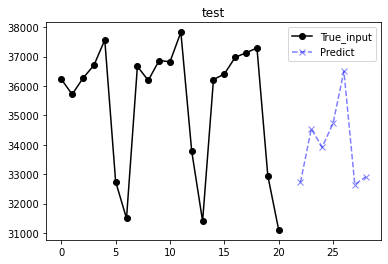

In [46]:
i = 11
plt.plot(np.arange(21), evening_x[i],   # m_train_time.cpu().detach().numpy()[i,:,-2],
            marker = 'o', color = 'black', label = 'True_input')
plt.plot(np.arange(22,29),evening_pred[i],    #.cpu().detach().numpy()[i],
        color = 'blue', label = 'Predict', marker = 'x', ls = '--', alpha = 0.5)
plt.title('test')
plt.legend()
plt.show()

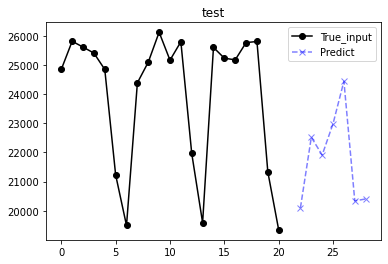

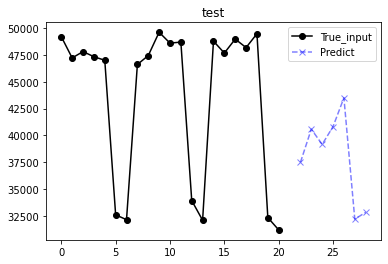

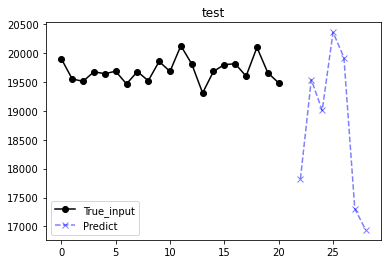

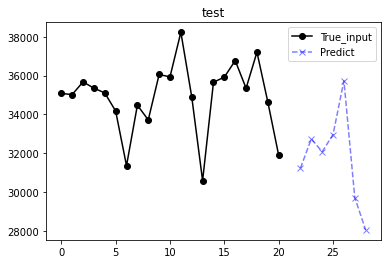

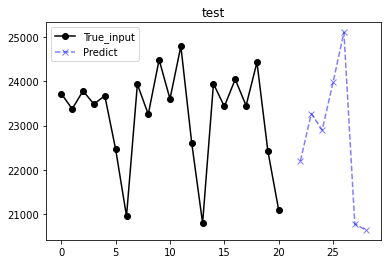

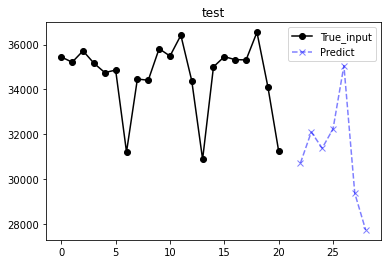

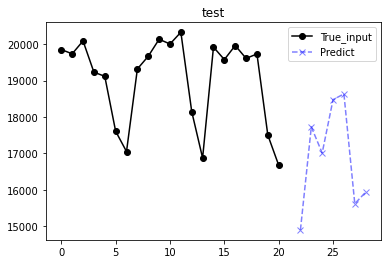

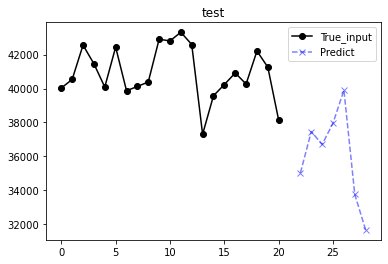

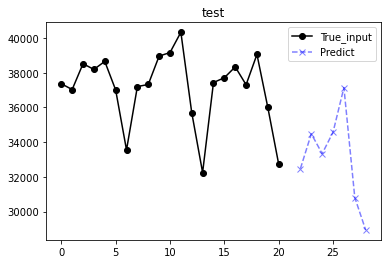

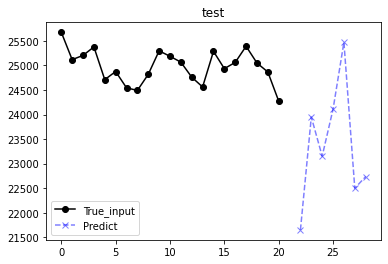

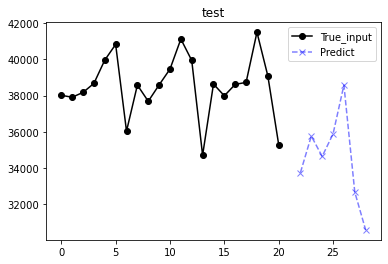

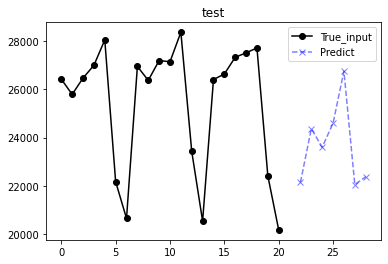

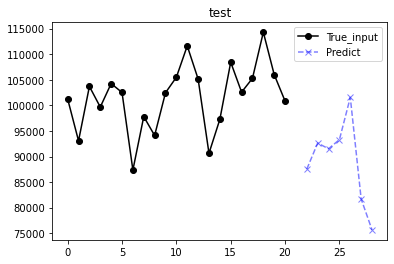

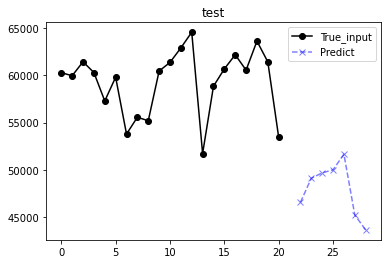

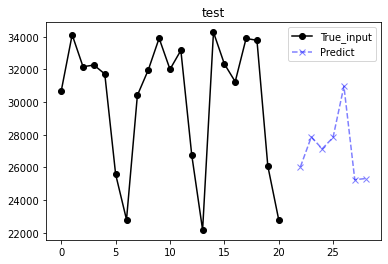

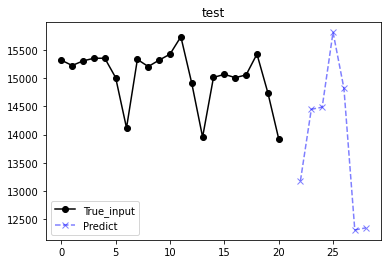

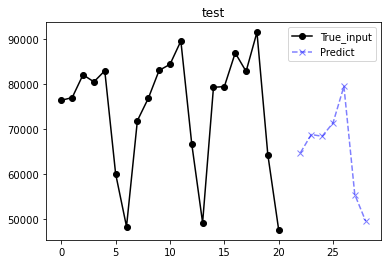

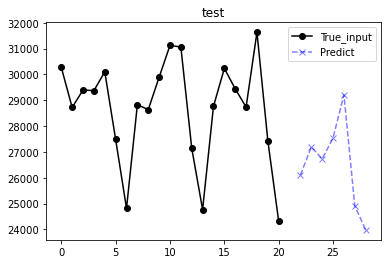

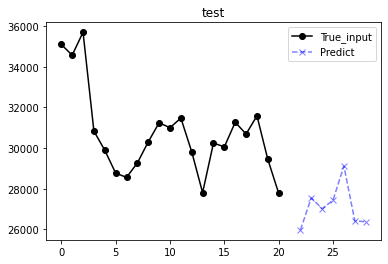

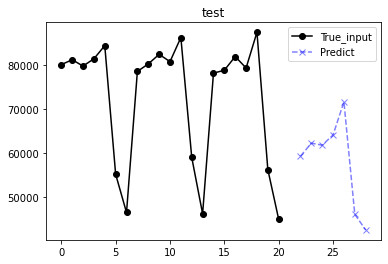

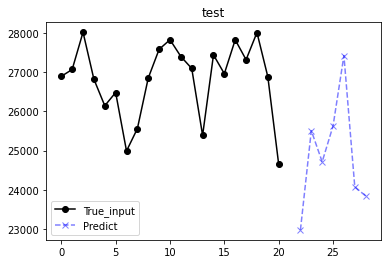

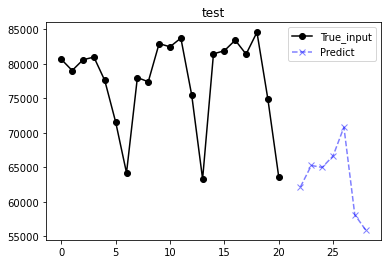

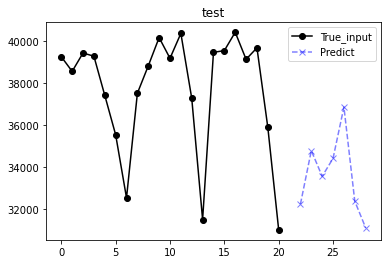

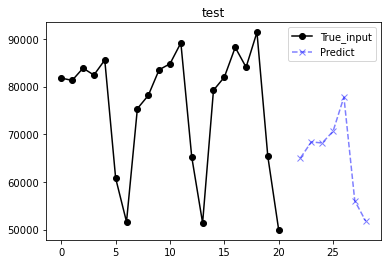

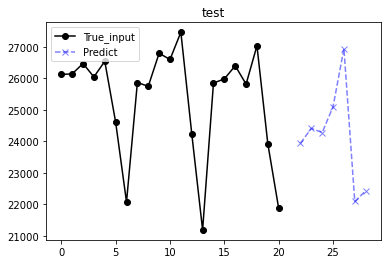

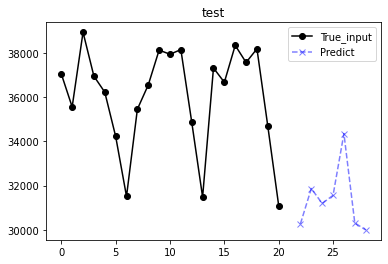

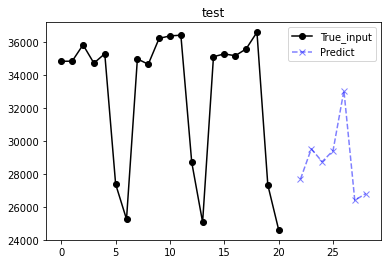

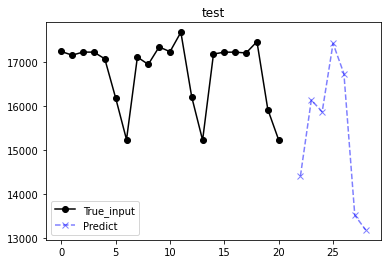

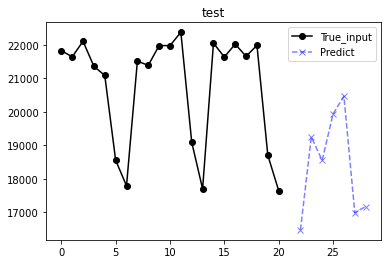

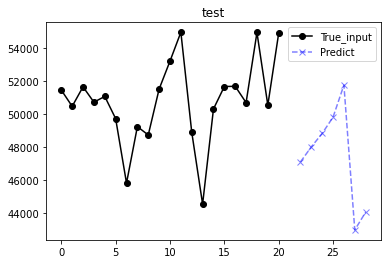

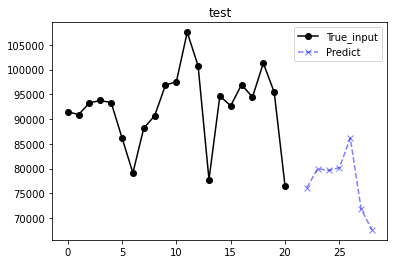

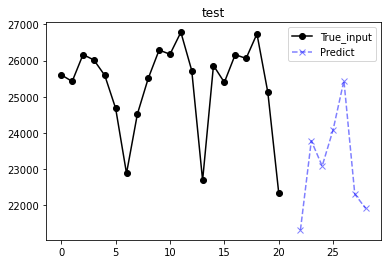

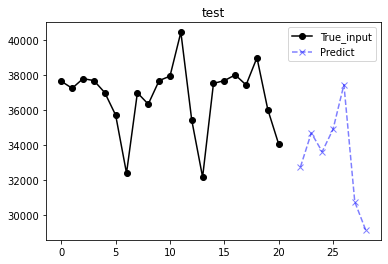

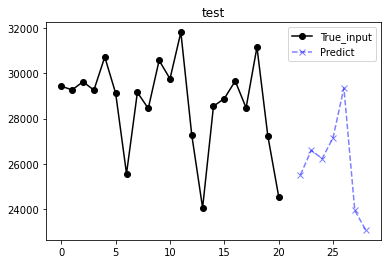

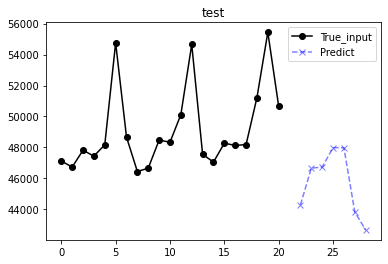

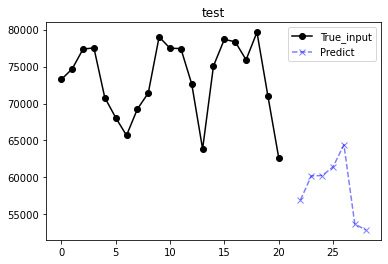

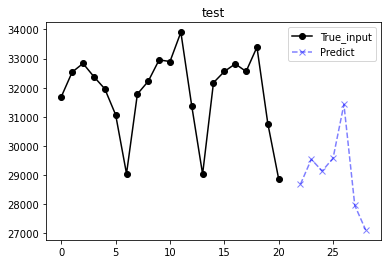

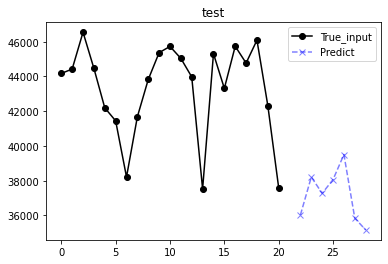

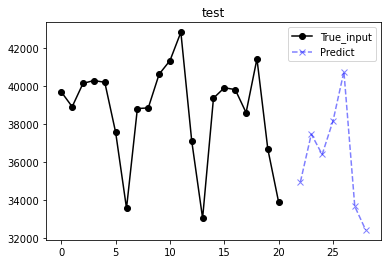

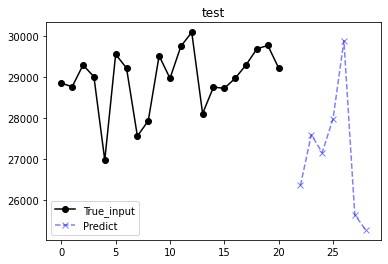

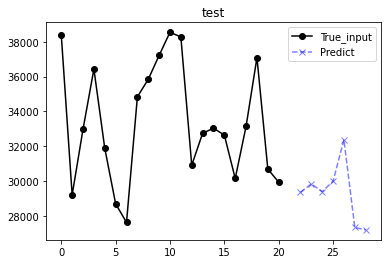

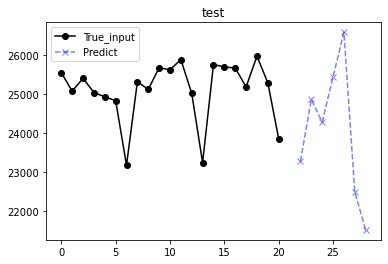

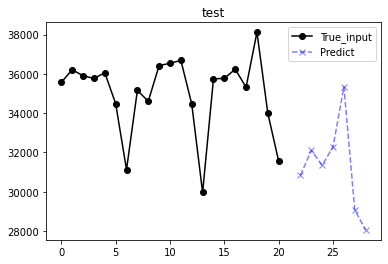

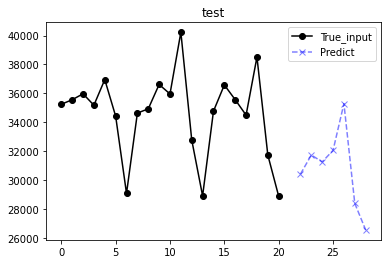

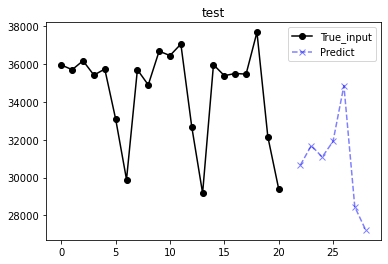

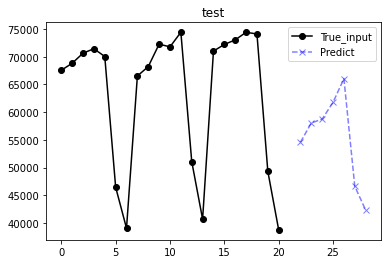

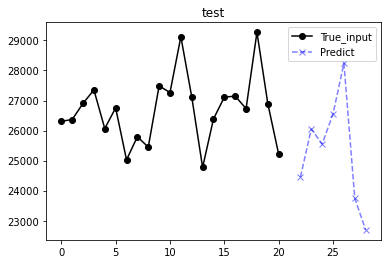

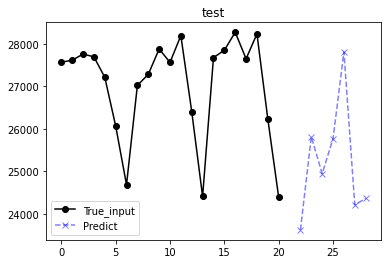

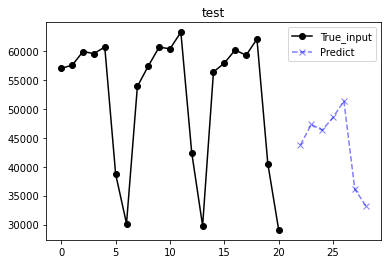

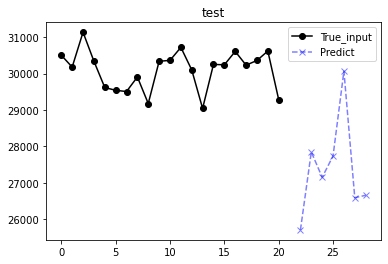

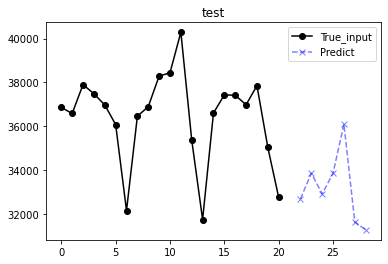

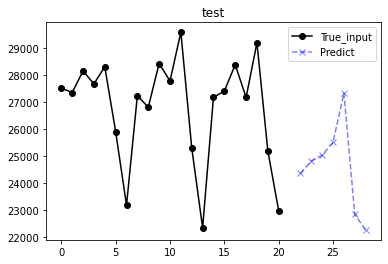

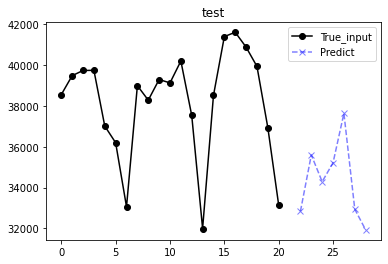

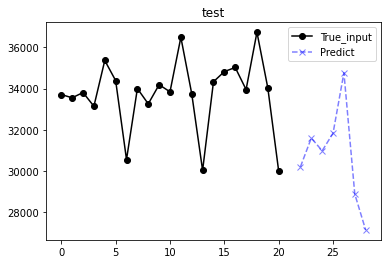

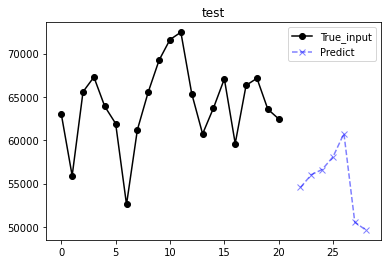

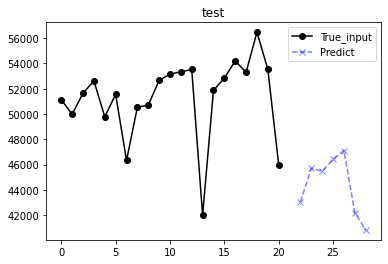

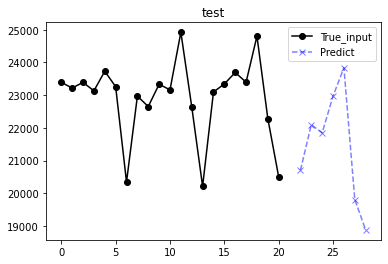

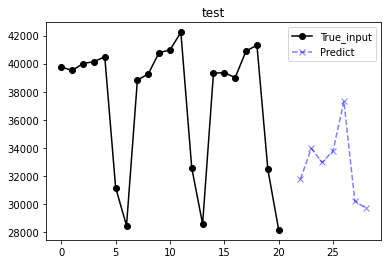

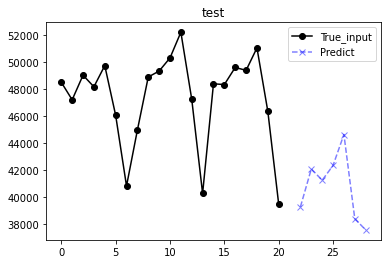

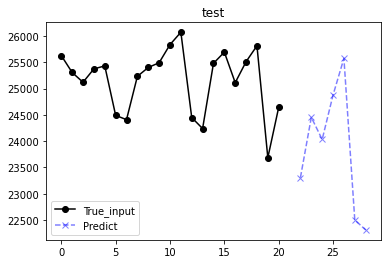

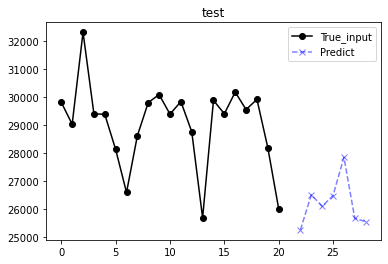

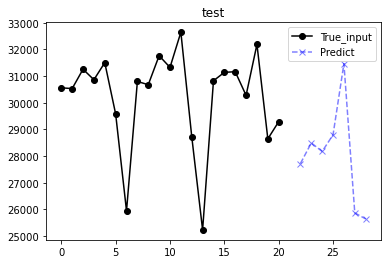

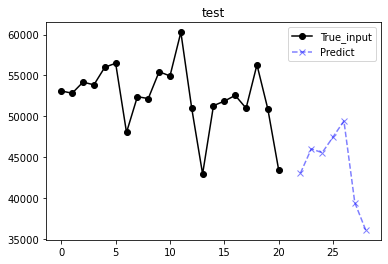

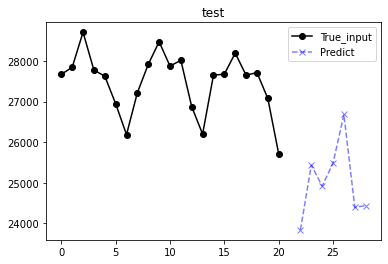

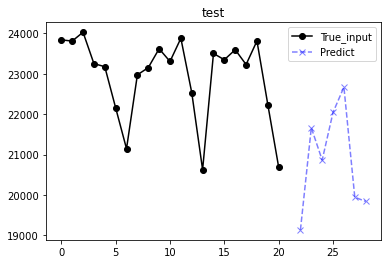

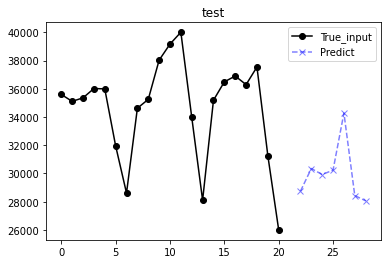

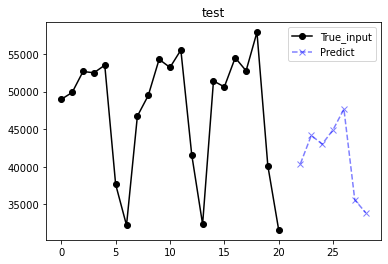

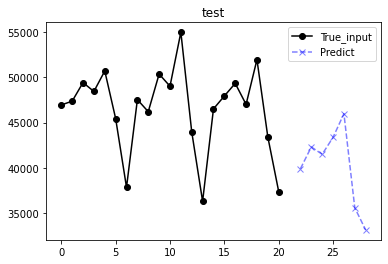

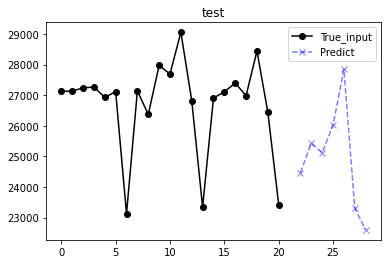

In [32]:
for i in range(69):
    plt.plot(np.arange(21), evening_x[i],   # m_train_time.cpu().detach().numpy()[i,:,-2],
            marker = 'o', color = 'black', label = 'True_input')
    plt.plot(np.arange(22,29),evening_pred[i],    #.cpu().detach().numpy()[i],
            color = 'blue', label = 'Predict', marker = 'x', ls = '--', alpha = 0.5)
    plt.title('test')
    plt.legend()
    plt.show()